# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Uvoz biblioteka</p>

In [262]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import ruptures as rpt
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import matplotlib.dates as mdates
import seaborn as sns

In [263]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
sns.set_palette(["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"])

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Opis atributa</p>

* `timestamp`: Vremenska oznaka kada su podaci snimljeni
* `sound`: Vrednost zvuka u datom trenutku (moguće u decibelima)
* `pressure`: Atmosferski pritisak u datom trenutku (moguće u hektopaskalima)
* `temp`: Temperatura vazduha u datom trenutku (moguće u stepenima Celzijusa)
* `humidity`: Relativna vlažnost vazduha u datom trenutku (moguće u procentima)
* `voc`: Vrednost organskih jedinjenja u vazduhu u datom trenutku (moguće u ppm, delovima po milionu)
* `pm1.0, pm2.5, pm10`: Broj čestica u vazduhu u datom trenutku, prema veličini čestica (moguće u broju čestica po kubnom metru)
* `CO2`: Vrednost ugljen-dioksida u vazduhu u datom trenutku (moguće u ppm)

In [264]:
df = pd.read_csv('environment_data.csv')
df.head()

,timestamp,sound,pressure,temp,humidity,voc,pm1.0,pm2.5,pm10,CO2
0,2022-11-07 00:00:01,0.881076,1012.037290,24.777757,35.996349,29466.0,26.0,36.0,45.0,421.0
1,2022-11-07 00:00:02,0.863325,1012.025698,24.762371,36.002125,29467.0,26.0,36.0,45.0,419.0
2,2022-11-07 00:00:03,0.908509,1012.083523,24.767500,36.013384,29459.0,26.0,36.0,45.0,418.0
3,2022-11-07 00:00:04,0.924645,1012.091207,24.767500,36.013384,29454.0,26.0,36.0,44.0,418.0
4,2022-11-07 00:00:05,0.896406,1012.091207,24.764935,36.013405,29458.5,26.0,36.0,44.0,416.0


In [265]:
df.dtypes

timestamp     object
sound        float64
pressure     float64
temp         float64
humidity     float64
voc          float64
pm1.0        float64
pm2.5        float64
pm10         float64
CO2          float64
dtype: object

In [266]:
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S")

df.dtypes

timestamp    datetime64[ns]
sound               float64
pressure            float64
temp                float64
humidity            float64
voc                 float64
pm1.0               float64
pm2.5               float64
pm10                float64
CO2                 float64
dtype: object

In [267]:
df.set_index('timestamp', inplace=True)

In [268]:
df.shape

(345151, 9)

In [269]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sound,345151.0,1.035109,0.493434,0.000000,0.931100,1.035990,1.229633,3.303227
pressure,345151.0,1014.807431,2.517912,1005.339453,1013.215952,1014.020586,1015.415069,1024.071917
temp,345151.0,25.123033,1.210600,20.326285,24.470044,24.972642,25.782958,28.293446
humidity,345151.0,34.636160,2.652997,26.962989,32.984199,34.628268,36.830740,41.651724
voc,345151.0,30512.354483,1329.625356,28427.000000,29458.000000,29964.500000,31443.000000,34535.000000
pm1.0,345151.0,49.980410,27.035828,20.000000,33.000000,38.000000,59.000000,270.500000
pm2.5,345151.0,68.674444,31.107893,30.000000,48.000000,54.000000,85.000000,279.500000
pm10,345151.0,79.883421,30.668957,33.000000,61.000000,68.000000,93.000000,428.000000
CO2,344264.0,442.465660,28.831611,400.000000,418.000000,440.000000,462.000000,562.000000


In [270]:
df_daily = df.copy()

unique_days = df_daily.resample('D').mean().index
features = ['sound', 'pressure', 'temp', 'humidity', 'voc', 'CO2', 'pm1.0', 'pm2.5', 'pm10']

labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']

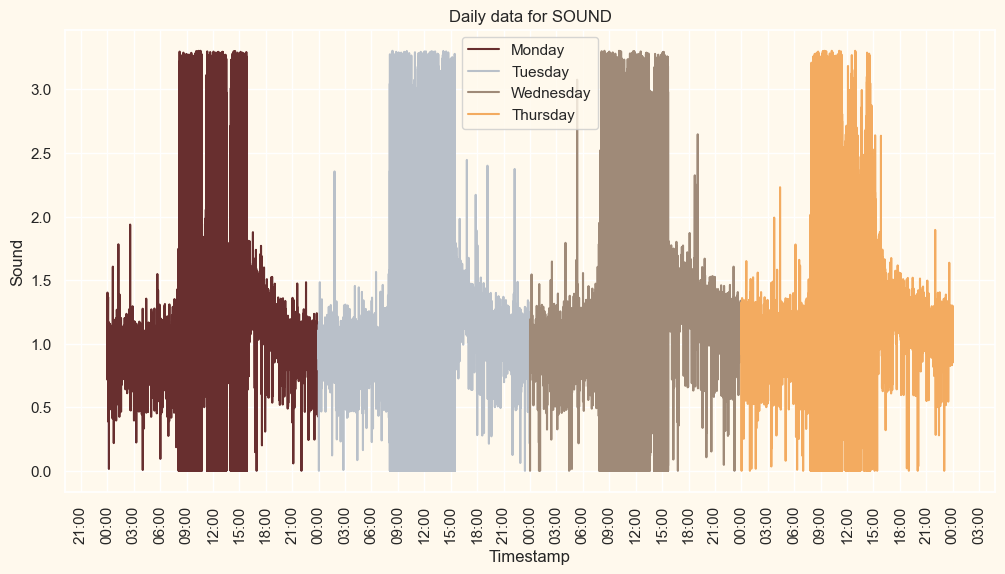

In [271]:
plt.figure(figsize=(12, 6))
    
for day in unique_days:
    day_data = df_daily[df_daily.index.date == day.date()]
        
    plt.plot(day_data.index, day_data['sound'], label='SOUND')
    
plt.xlabel('Timestamp')
plt.ylabel('Sound')
plt.title(f'Daily data for SOUND')
plt.legend(labels=labels)
plt.grid(True)
plt.xticks(rotation=90)
    
# Set x-axis labels every 6 hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
plt.show()

Na osnovu zvuka mozemo zakljuciti da je period rada u toku jednog radnog dana najverovatnije od 08:00h do 16:00h. Zato sto je zvuk u tom periodu najintenzivniji u prostoriji.

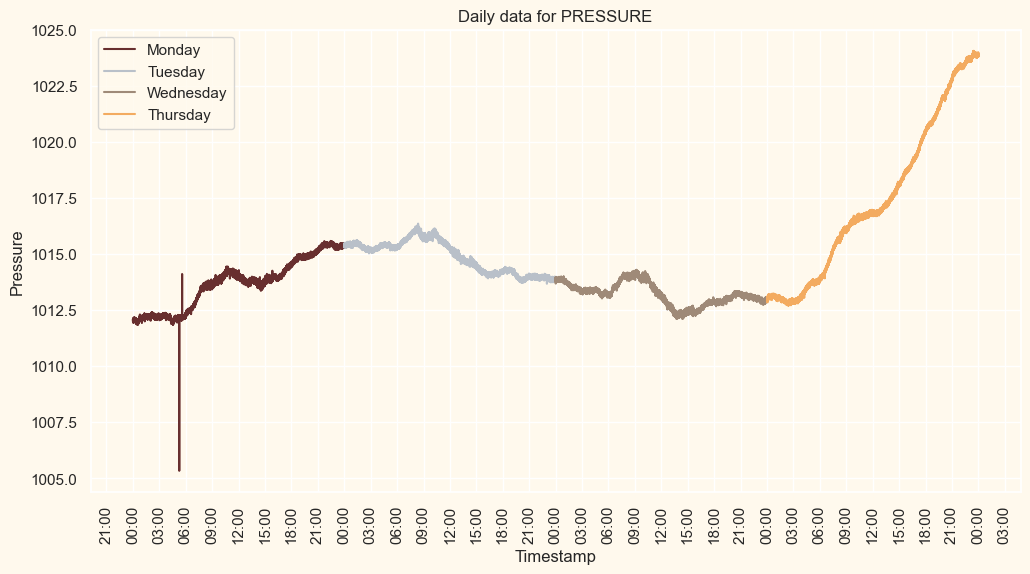

In [272]:
plt.figure(figsize=(12, 6))
    
for day in unique_days:
    day_data = df_daily[df_daily.index.date == day.date()]
        
    plt.plot(day_data.index, day_data['pressure'], label='PRESSURE')
    
plt.xlabel('Timestamp')
plt.ylabel('Pressure')
plt.title(f'Daily data for PRESSURE')
plt.legend(labels=labels)
plt.grid(True)
plt.xticks(rotation=90)
    
# Set x-axis labels every 6 hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
plt.show()

U slucaju sa pritiskom se ne moze najjasnije zakljuciti na osnovu grafika bilo kakvo postojanje nekakvog obrasca. Vidimo da postoji neka potencijalna greska uredjaja u ponedeljak u 05:00h.

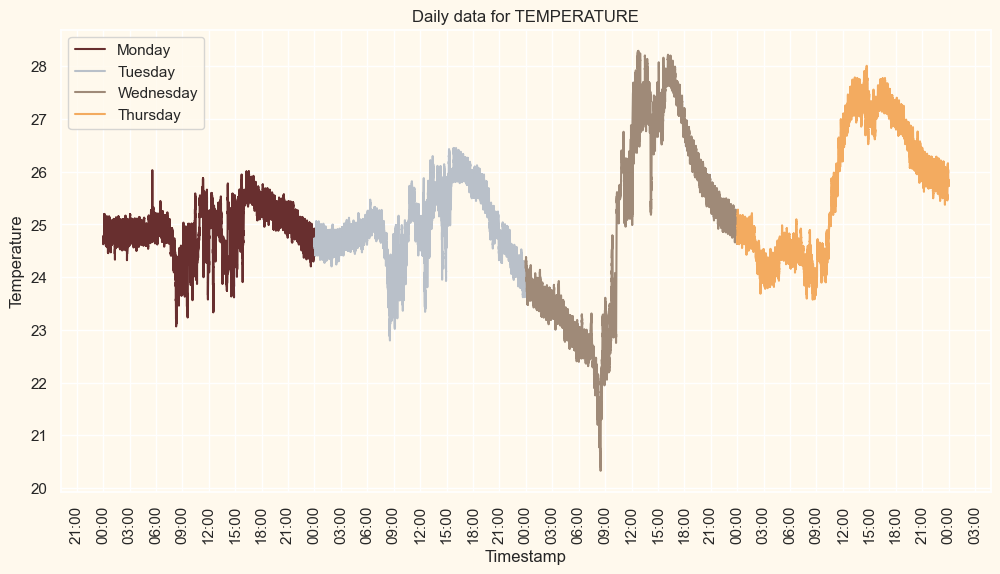

In [273]:
plt.figure(figsize=(12, 6))
    
for day in unique_days:
    day_data = df_daily[df_daily.index.date == day.date()]
        
    plt.plot(day_data.index, day_data['temp'], label='TEMPERATURE')
    
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title(f'Daily data for TEMPERATURE')
plt.legend(labels=labels)
plt.grid(True)
plt.xticks(rotation=90)
    
# Set x-axis labels every 6 hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
plt.show()

Svakog dana oko pola 9 se detektuje najniza temperatura. Razlog za ovo moze biti taj sto u to vreme radnici dolaze, eventualno otvaraju vrata i prozore kako bi rashladili prostorije. Tokom noci su temperature najvece.

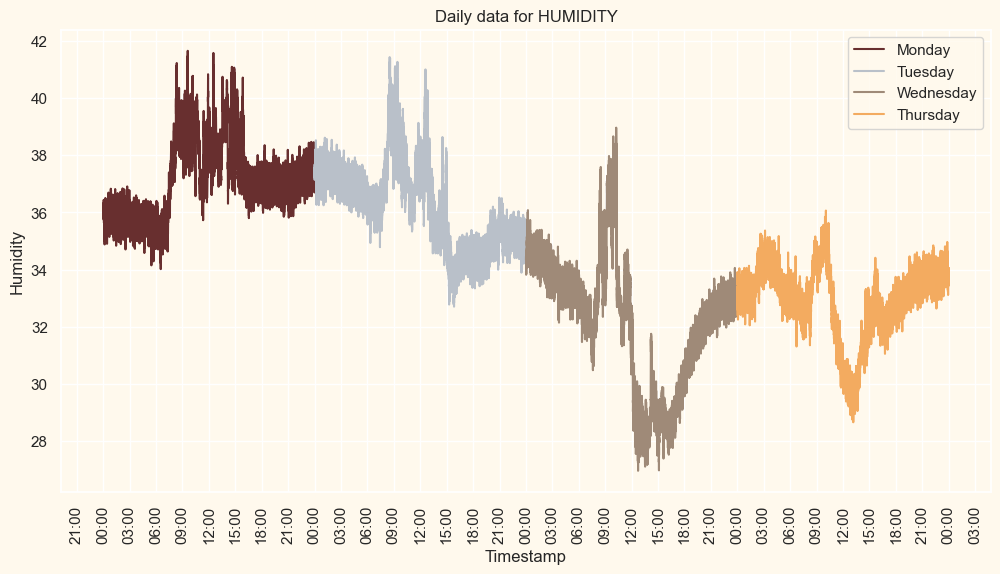

In [274]:
plt.figure(figsize=(12, 6))
    
for day in unique_days:
    day_data = df_daily[df_daily.index.date == day.date()]
        
    plt.plot(day_data.index, day_data['humidity'], label='HUMIDITY')
    
plt.xlabel('Timestamp')
plt.ylabel('Humidity')
plt.title(f'Daily data for HUMIDITY')
plt.legend(labels=labels)
plt.grid(True)
plt.xticks(rotation=90)
    
# Set x-axis labels every 6 hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
plt.show()

Vlaznost vazduha kao da je obrnuto proporcionalna u odnosu na temperaturu. U periodima padova temperature, vlaznost vazduha raste i obratno.

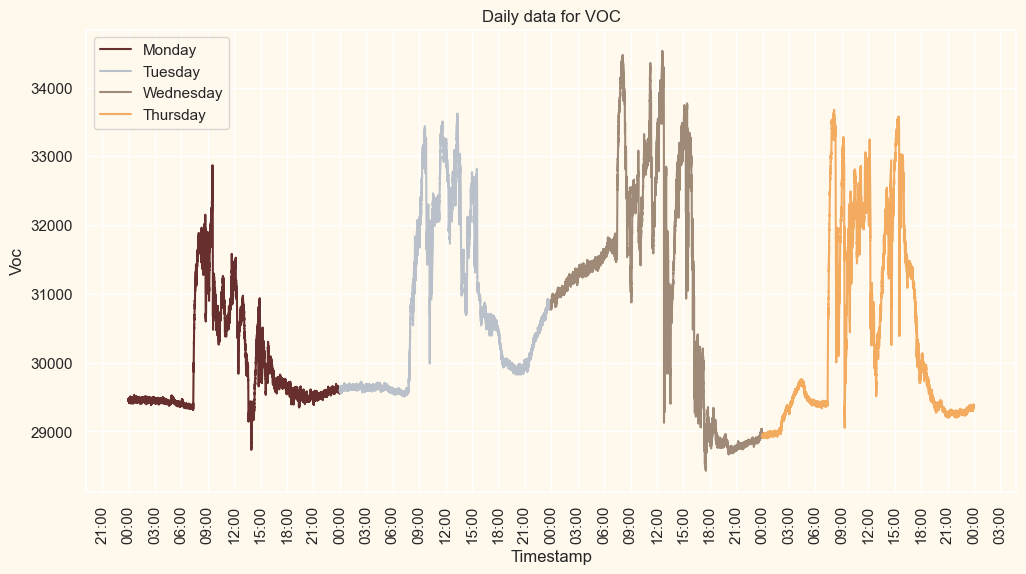

In [275]:
plt.figure(figsize=(12, 6))
    
for day in unique_days:
    day_data = df_daily[df_daily.index.date == day.date()]
        
    plt.plot(day_data.index, day_data['voc'], label='VOC')
    
plt.xlabel('Timestamp')
plt.ylabel('Voc')
plt.title(f'Daily data for VOC')
plt.legend(labels=labels)
plt.grid(True)
plt.xticks(rotation=90)
    
# Set x-axis labels every 6 hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
plt.show()

Isparljiva organska jedinjenja se u prostoriji nalaze u najvecoj koncentraciji za vreme radnog vremena, sto je i ocekivano.

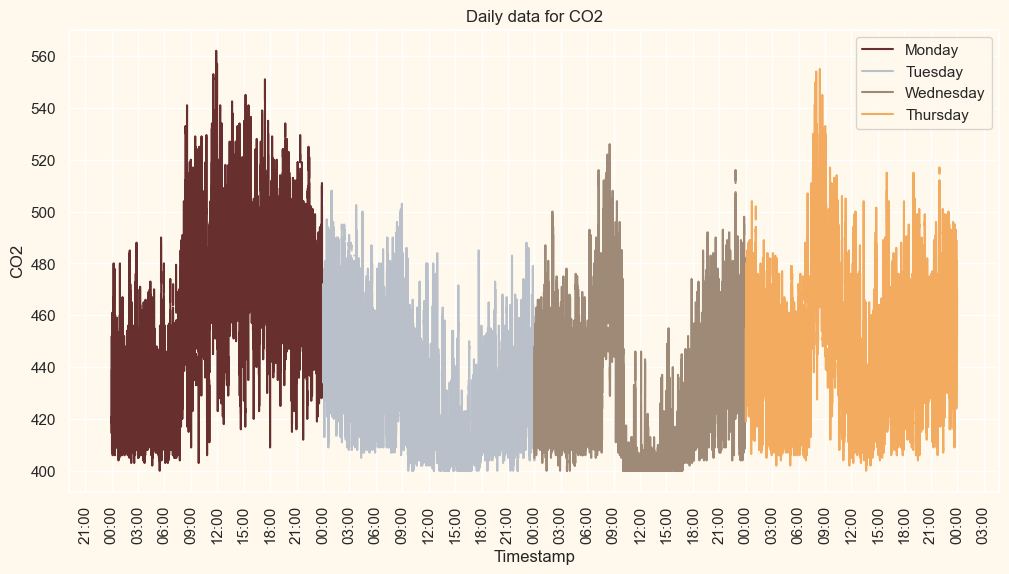

In [276]:
plt.figure(figsize=(12, 6))
    
for day in unique_days:
    day_data = df_daily[df_daily.index.date == day.date()]
        
    plt.plot(day_data.index, day_data['CO2'], label='CO2')
    
plt.xlabel('Timestamp')
plt.ylabel('CO2')
plt.title(f'Daily data for CO2')
plt.legend(labels=labels)
plt.grid(True)
plt.xticks(rotation=90)
    
# Set x-axis labels every 6 hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
plt.show()

Najveca koncentracija u periodu radnog vremena.

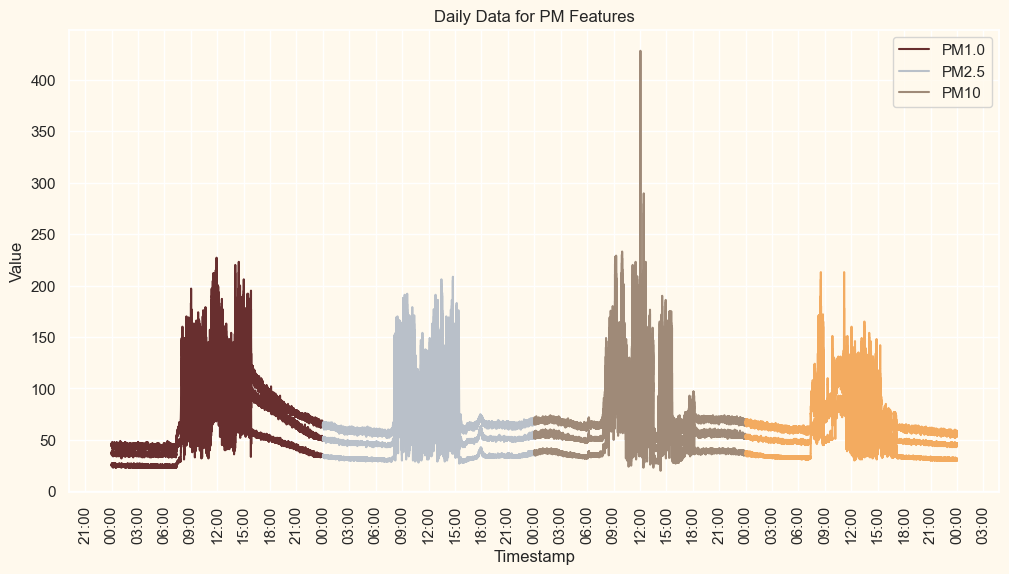

In [277]:
plt.figure(figsize=(12, 6))

features = ['pm1.0', 'pm2.5', 'pm10']
labels = ['PM1.0', 'PM2.5', 'PM10']

for feature in features:
    for day in unique_days:
        day_data = df_daily[df_daily.index.date == day.date()]
        plt.plot(day_data.index, day_data[feature], label=feature)
    
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Daily Data for PM Features')
plt.legend(labels=labels)
plt.grid(True)
plt.xticks(rotation=90)

# Set x-axis labels every 6 hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()


Najveca koncentracija u periodu radnog vremena.

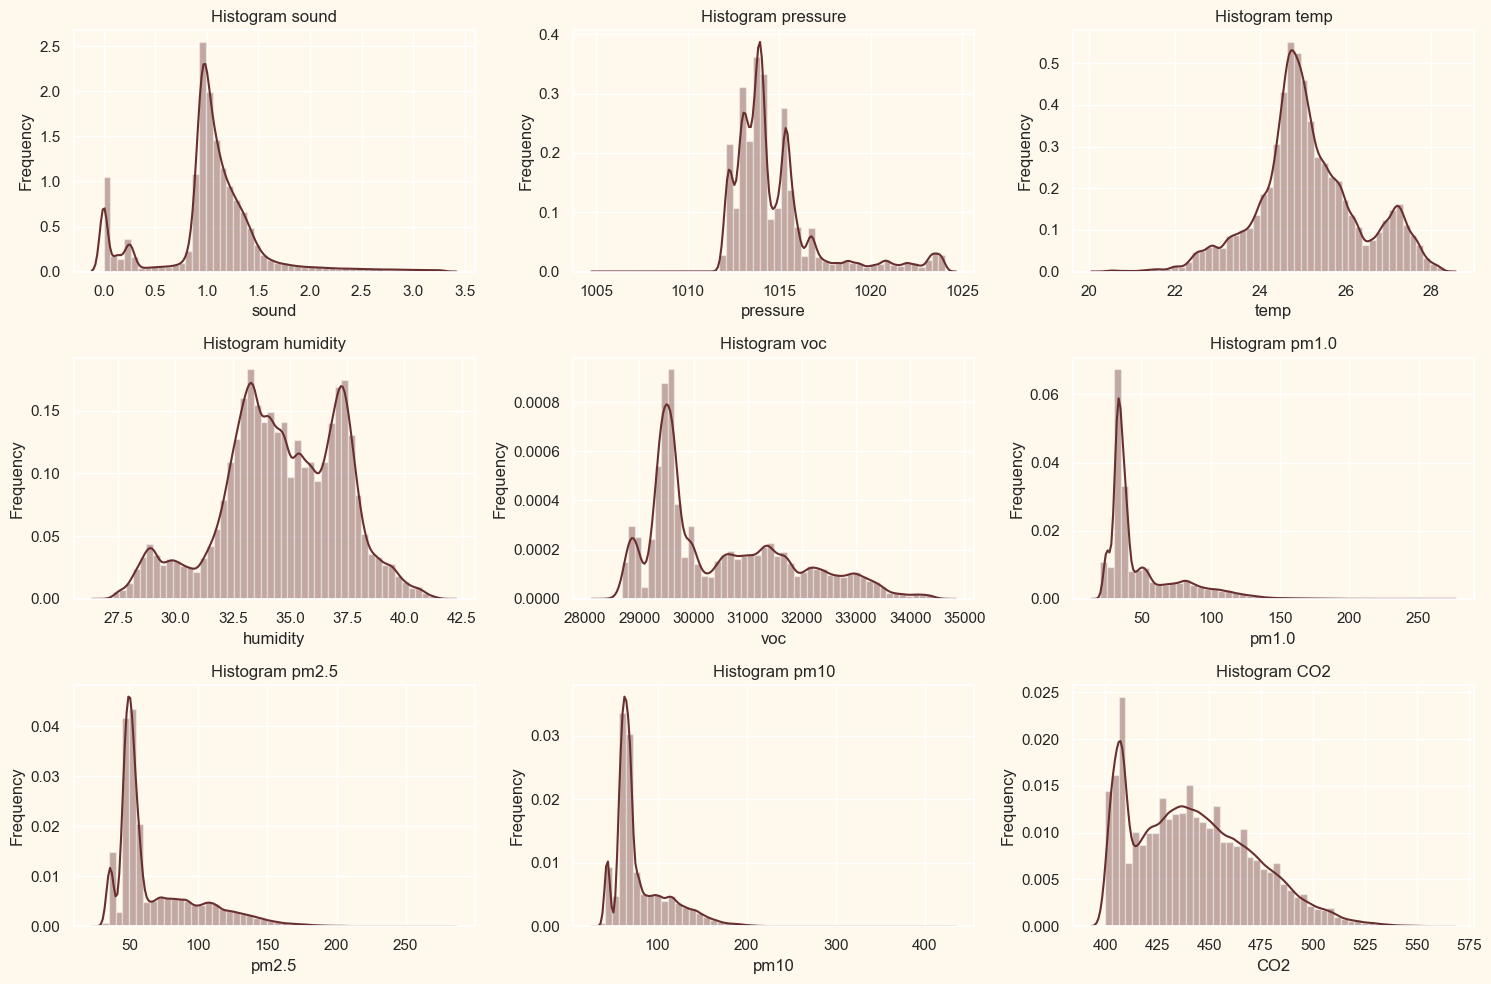

In [278]:
broj_grafikona_po_redu = 3
broj_grafikona_po_koloni = 3

fig, axs = plt.subplots(broj_grafikona_po_koloni, broj_grafikona_po_redu, figsize=(15, 10))

indeks_grafikona = 0

for red in range(broj_grafikona_po_koloni):
    for kolona in range(broj_grafikona_po_redu):
        
        if indeks_grafikona < len(df.columns):

            atribut = df.columns[indeks_grafikona]
            
            axs[red, kolona].set_ylabel('Frequency')
            axs[red, kolona].set_xlabel(atribut)
            axs[red, kolona].set_title('Histogram {}'.format(atribut))
            sns.distplot(df[atribut], ax=axs[red, kolona])
            
            indeks_grafikona += 1
            
# podesite raspored grafikona i prikažite ih
plt.tight_layout()
plt.show()

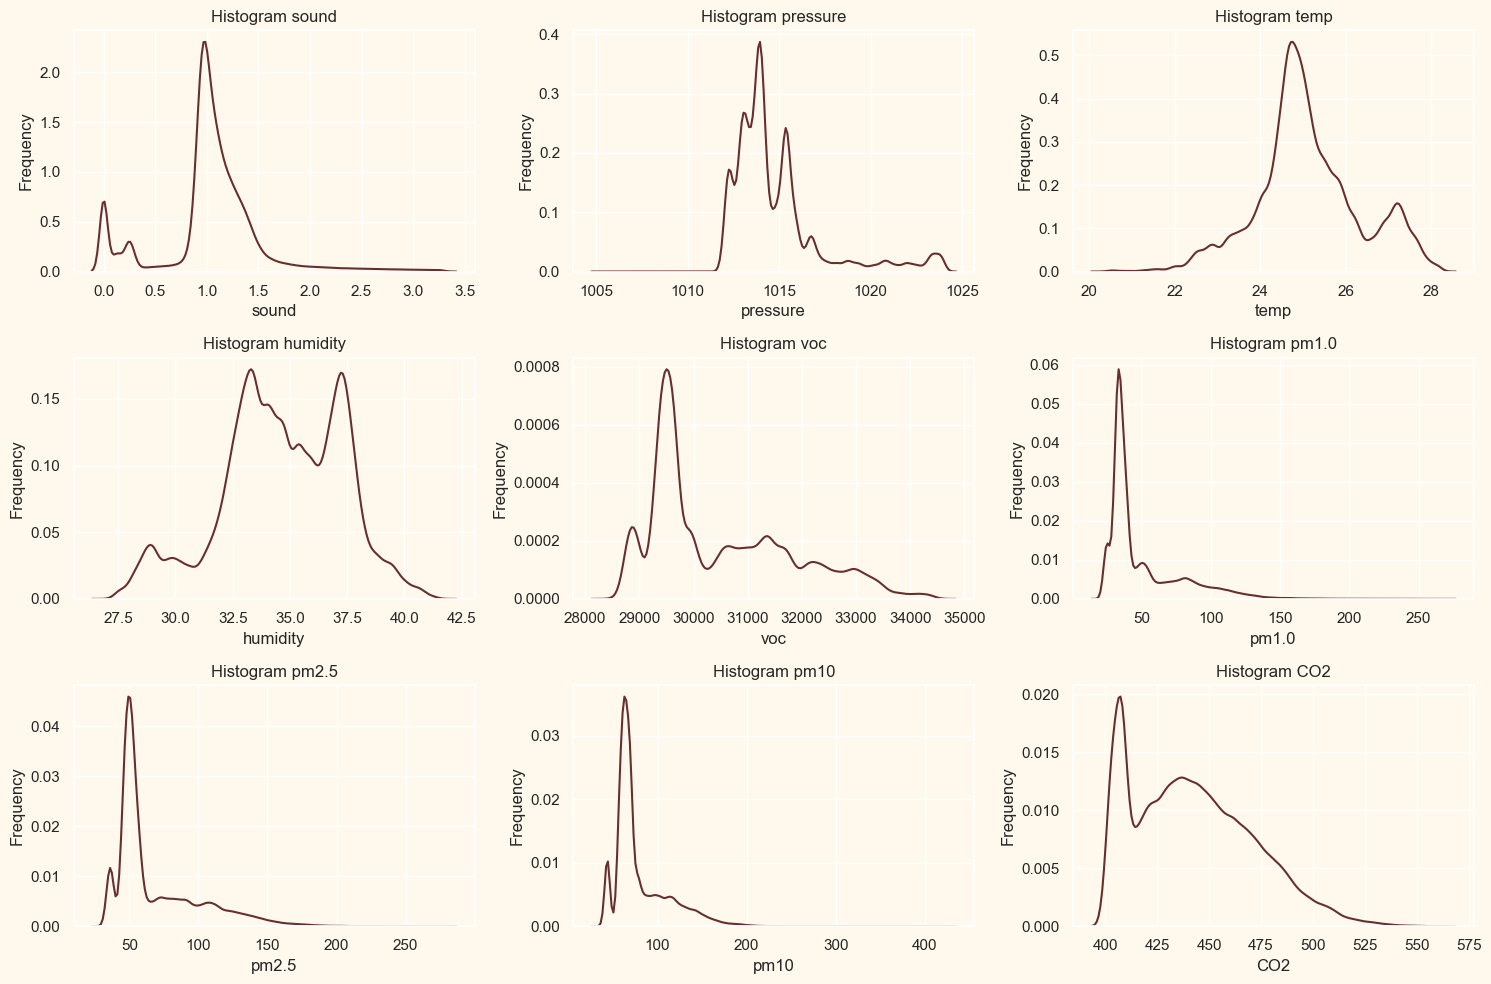

In [279]:
broj_grafikona_po_redu = 3
broj_grafikona_po_koloni = 3

fig, axs = plt.subplots(broj_grafikona_po_koloni, broj_grafikona_po_redu, figsize=(15, 10))

indeks_grafikona = 0

for red in range(broj_grafikona_po_koloni):
    for kolona in range(broj_grafikona_po_redu):
        
        if indeks_grafikona < len(df.columns):

            atribut = df.columns[indeks_grafikona]
            
            axs[red, kolona].set_ylabel('Frequency')
            axs[red, kolona].set_xlabel(atribut)
            axs[red, kolona].set_title('Histogram {}'.format(atribut))
            sns.kdeplot(df[atribut], ax=axs[red, kolona])
            
            indeks_grafikona += 1
            
# podesite raspored grafikona i prikažite ih
plt.tight_layout()
plt.show()

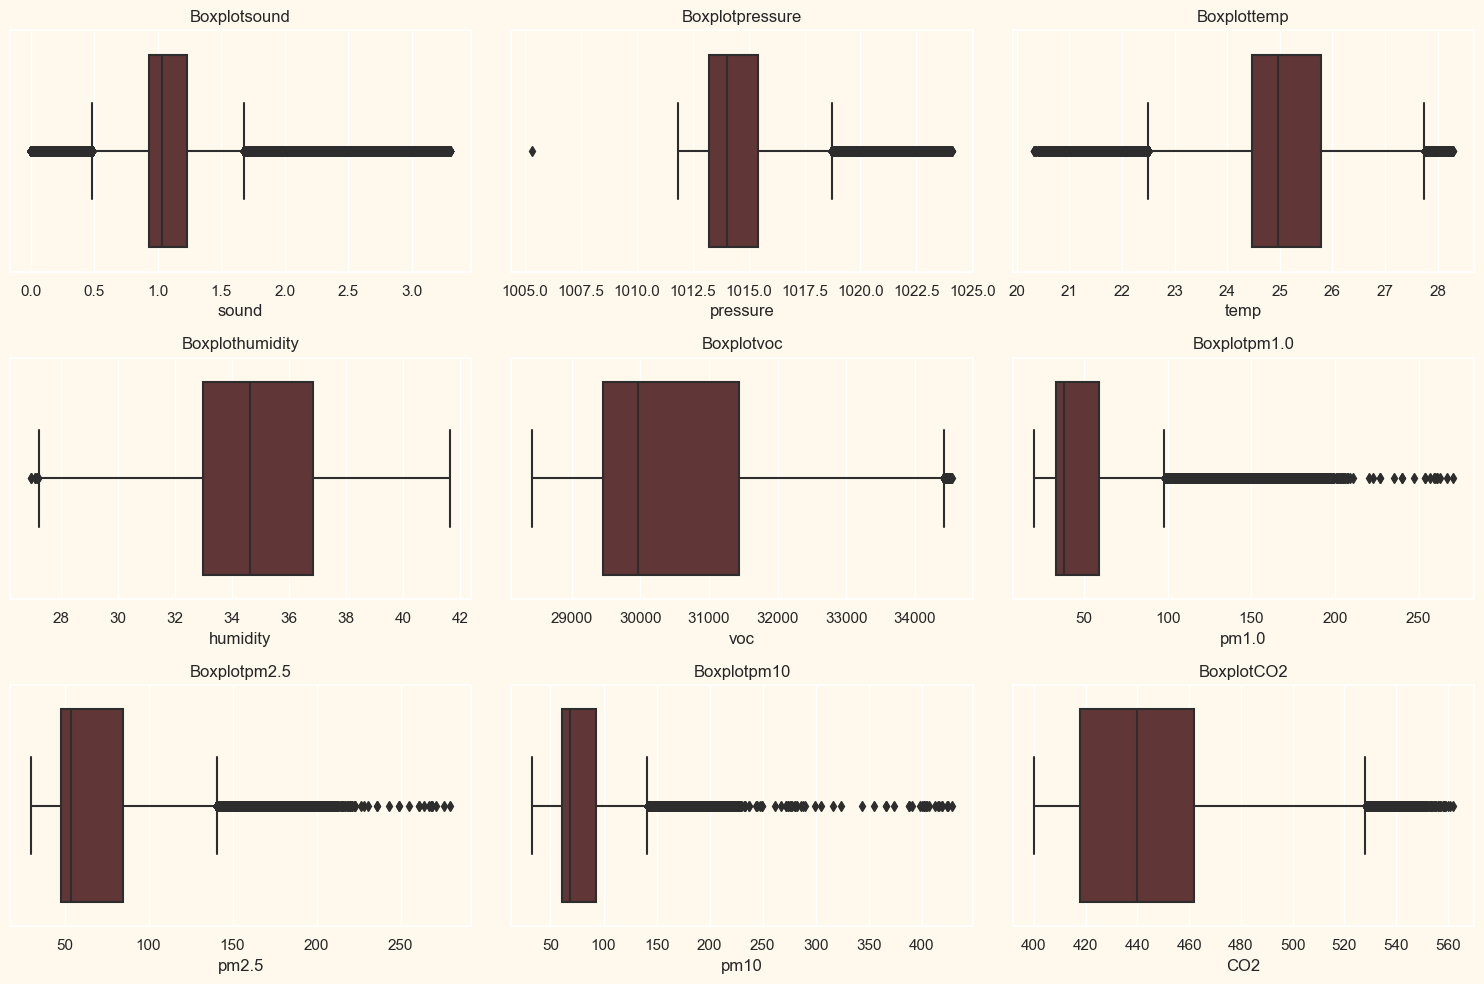

In [280]:
broj_grafikona_po_redu = 3
broj_grafikona_po_koloni = 3

fig, axs = plt.subplots(broj_grafikona_po_koloni, broj_grafikona_po_redu, figsize=(15, 10))

indeks_grafikona = 0

for red in range(broj_grafikona_po_koloni):
    for kolona in range(broj_grafikona_po_redu):
        
        if indeks_grafikona < len(df.columns):

            atribut = df.columns[indeks_grafikona]
            
            axs[red, kolona].set_xlabel(atribut)
            axs[red, kolona].set_title('Boxplot{}'.format(atribut))
            sns.boxplot(data=df, x = atribut ,ax=axs[red, kolona])
            
            indeks_grafikona += 1
            
# podesite raspored grafikona i prikažite ih
plt.tight_layout()
plt.show()

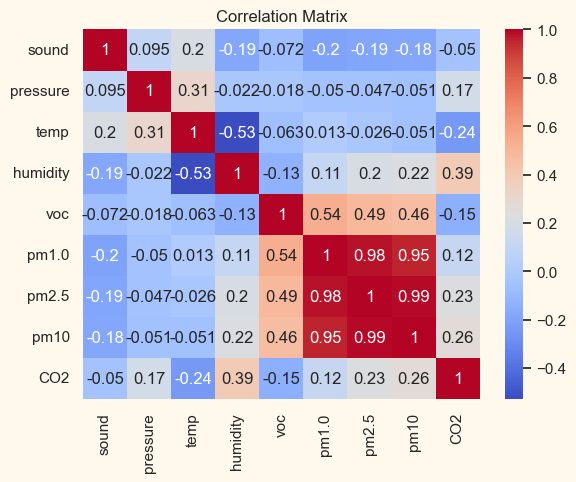

In [281]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Zbog visoke korelacije izmedju pm atributa, javlja se mogucnost njihovog stapanja u jedan atribut.

In [282]:
def moving_average(df, window_size, column):
    custom_palette = ["#682F2F", "#F3AB60", "#5E8C31", "#5B82AA", "#F0E68C"]
    sns.set_palette(custom_palette)
    df[column + '_moving_average'] = df[column].rolling(window=window_size).mean()
    df[column + '_median'] = df[column].rolling(window=window_size).median()
    df[column + '_variance'] = df[column].rolling(window=window_size).var()
    df[column + '_std'] = df[column].rolling(window=window_size).std()

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column], label='Original Data')
    plt.plot(df.index, df[column + '_moving_average'], label=f'Moving Average ({window_size/3600}-hours)')
    plt.plot(df.index, df[column + '_median'], label=f'Median ({window_size/3600}-hours)')
    plt.plot(df.index, df[column + '_variance'], label=f'Variance ({window_size/3600}-hours)')
    plt.plot(df.index, df[column + '_std'], label=f'Standard Deviation ({window_size/3600}-hours)')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{column} with Moving Average, Median, Variance, and Standard Deviation')
    plt.legend()
    plt.show()

    df.drop(column + '_moving_average', axis=1, inplace=True)
    df.drop(column + '_median', axis=1, inplace=True)
    df.drop(column + '_variance', axis=1, inplace=True)
    df.drop(column + '_std', axis=1, inplace=True)

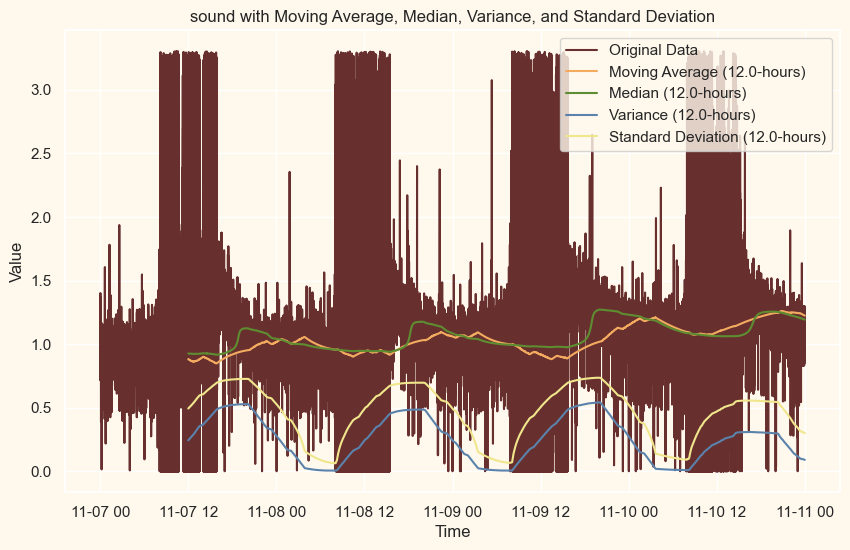

In [283]:
hour12 = 3600*12
moving_average(df, hour12, 'sound')

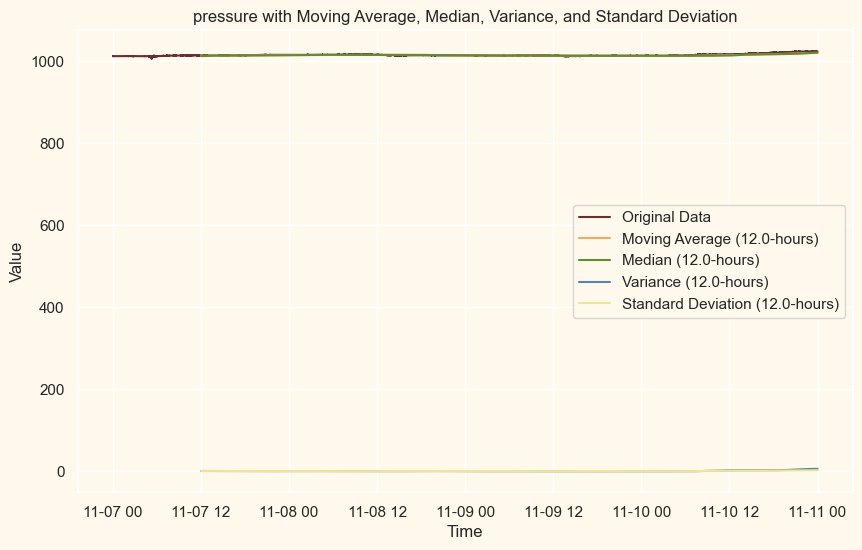

In [284]:
moving_average(df, hour12, 'pressure')

Primecujemo da je standardna devijacija veoma niska. Ovo znaci da postoji veoma mala odstupanja. Na ovo ukazuje i delimicno normalna raspodela.

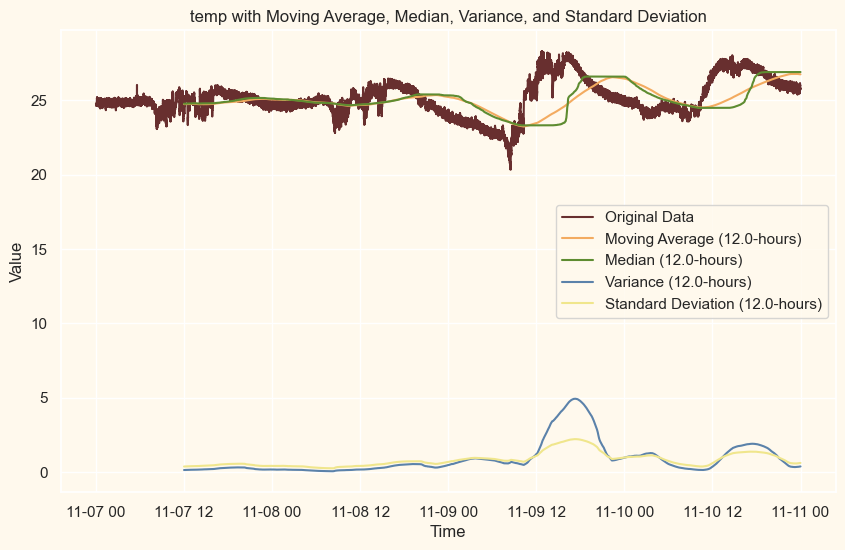

In [285]:
moving_average(df, hour12, 'temp')

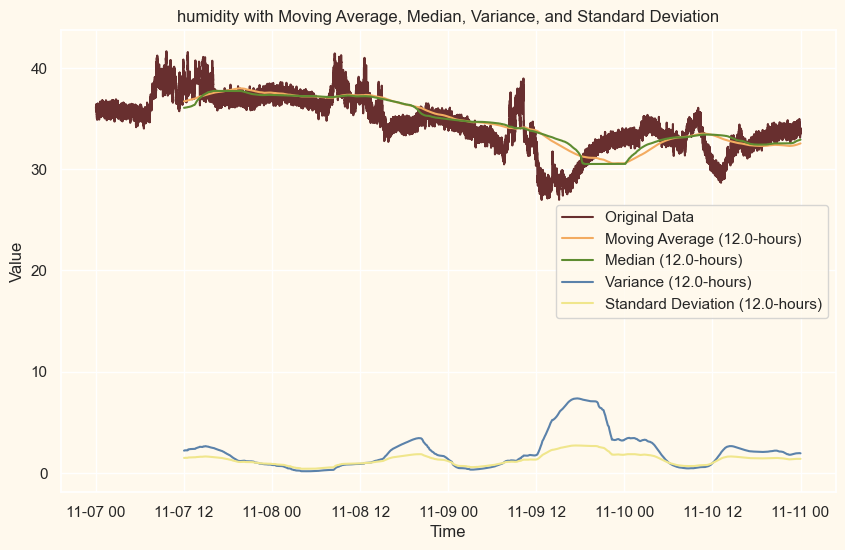

In [286]:
moving_average(df, hour12, 'humidity')

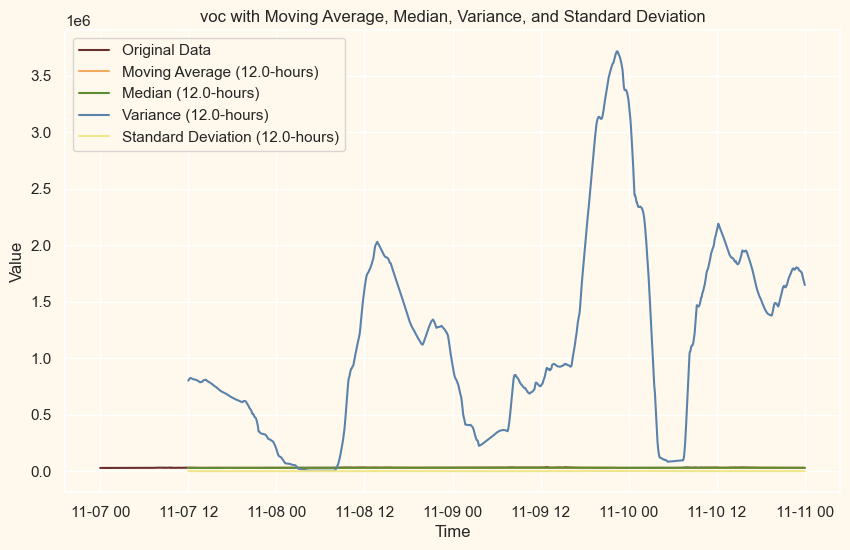

In [287]:
moving_average(df, hour12, 'voc')

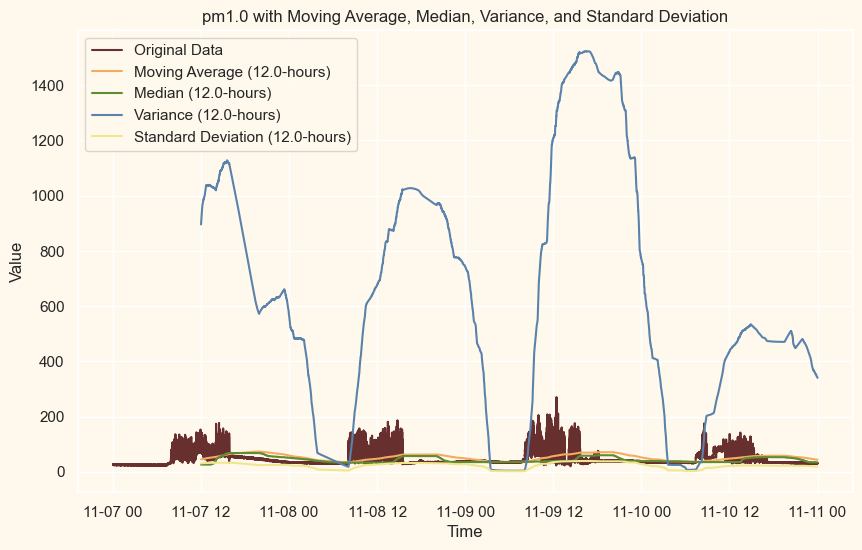

In [288]:
moving_average(df, hour12, 'pm1.0')

U pitanju su datumi jedne radne nedelje  (Ponedeljak - Četvrtak).

Sound, voc, pm-ovi su noci drasticno manji, sto je i ocekivano.

9. Novembra se dasticno smanjio CO2, temperatura i vlaznost, a drasticno je skocio pm, a i voc je bio najvisi od svih.

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Preprocesiranje podataka</p>

In [289]:
df.columns

Index(['sound', 'pressure', 'temp', 'humidity', 'voc', 'pm1.0', 'pm2.5',
       'pm10', 'CO2'],
      dtype='object')

In [290]:
df.isnull().sum()

sound         0
pressure      0
temp          0
humidity      0
voc           0
pm1.0         0
pm2.5         0
pm10          0
CO2         887
dtype: int64

In [291]:
missing_df = df[df['CO2'].isna()]

# Compute time differences between missing values
time_diff = missing_df.index.to_series().diff()

# Check if time differences are equal to time interval
is_regular = all(time_diff == time_diff.iloc[0])

if is_regular:
    print("Missing values occur at regular intervals.")
else:
    print("Missing values do not occur at regular intervals.")

Missing values do not occur at regular intervals.


In [292]:
df['CO2'] = df['CO2'].interpolate(method='linear')
df.isnull().sum()

sound       0
pressure    0
temp        0
humidity    0
voc         0
pm1.0       0
pm2.5       0
pm10        0
CO2         0
dtype: int64

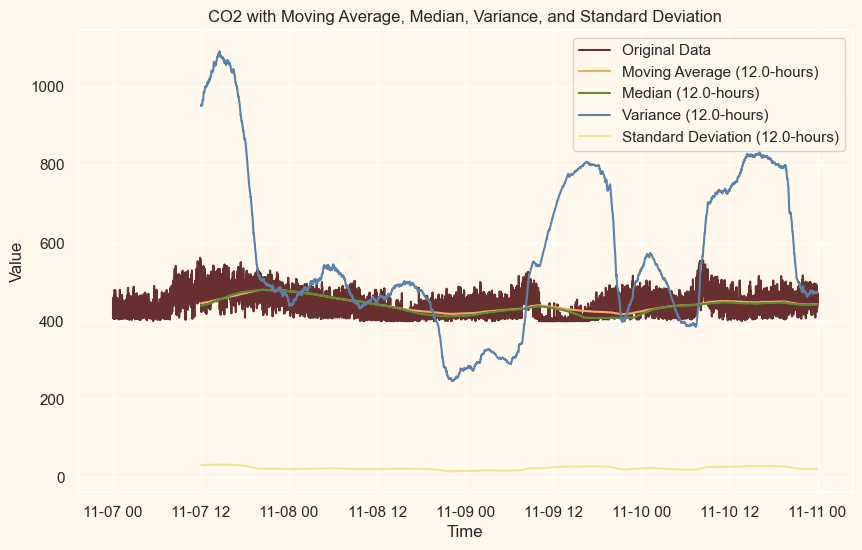

In [293]:
moving_average(df, hour12, 'CO2')

In [294]:
df.head()

,sound,pressure,temp,humidity,voc,pm1.0,pm2.5,pm10,CO2
timestamp,,,,,,,,,
2022-11-07 00:00:01,0.881076,1012.037290,24.777757,35.996349,29466.0,26.0,36.0,45.0,421.0
2022-11-07 00:00:02,0.863325,1012.025698,24.762371,36.002125,29467.0,26.0,36.0,45.0,419.0
2022-11-07 00:00:03,0.908509,1012.083523,24.767500,36.013384,29459.0,26.0,36.0,45.0,418.0
2022-11-07 00:00:04,0.924645,1012.091207,24.767500,36.013384,29454.0,26.0,36.0,44.0,418.0
2022-11-07 00:00:05,0.896406,1012.091207,24.764935,36.013405,29458.5,26.0,36.0,44.0,416.0


In [295]:
df.duplicated().sum()

0

In [296]:
df.shape

(345151, 9)

In [297]:
def adf_test(timeseries, name):
    print(f'\nRezultati Dickey-Fuller testa za {name}:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput.to_string())

    if dftest[1] < 0.05:
        print(f"Podaci {name} su stacionarni.")
    else:
        print(f"Podaci {name} nisu stacionarni.")

In [298]:
#for column in df.columns:
    #adf_test(df[column], column)

In [299]:
df_resampled = df.resample('1S').mean()

df_resampled = df_resampled.interpolate()

new_index = pd.date_range(start=df_resampled.index[0], end=df_resampled.index[-1], freq='1S')

df_resampled.index = new_index

In [300]:
df_resampled.shape, df.shape

((345599, 9), (345151, 9))

In [301]:
df_resampled.isna().sum()

sound       0
pressure    0
temp        0
humidity    0
voc         0
pm1.0       0
pm2.5       0
pm10        0
CO2         0
dtype: int64

In [302]:
df_resampled.shape

(345599, 9)

In [303]:
def IQR(data, column, threshold=1.5):
    
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - threshold * iqr
    upper = q3 + threshold * iqr
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

In [304]:
num = df_resampled.shape[0]
for column in df_resampled.columns:
    outliers = IQR(df_resampled, column, threshold=1.5)
    df_resampled = df_resampled[~df_resampled.index.isin(outliers.index)]
print(num - df_resampled.shape[0])

200567


In [305]:
df_resampled.shape

(145032, 9)

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Redukcija atributa</p>

In [306]:
df_resampled_reduced = df_resampled.copy()
pca1 = PCA(n_components=1)
df_resampled_reduced['PCA_pm'] = pca1.fit_transform(df_resampled[['pm1.0', 'pm2.5', 'pm10']])
df_resampled_reduced.drop(['pm1.0','pm2.5','pm10'],axis=1, inplace=True)
df_resampled_reduced

,sound,pressure,temp,humidity,voc,CO2,PCA_pm
2022-11-07 00:00:32,0.803619,1012.099019,24.716214,36.053346,29467.0,422.0,25.155128
2022-11-07 00:00:33,0.955306,1012.068283,24.716214,36.064645,29459.0,422.0,25.155128
2022-11-07 00:00:34,1.045672,1012.068283,24.716214,36.064645,29454.0,423.0,25.155128
2022-11-07 00:00:35,0.824597,1012.049011,24.721343,35.979857,29456.5,425.5,24.558151
2022-11-07 00:00:36,1.216724,1012.014371,24.731600,35.889372,29459.0,426.0,24.558151
...,...,...,...,...,...,...,...
2022-11-10 15:39:22,1.342592,1018.624343,26.757399,33.680077,32406.0,443.0,-16.593673
2022-11-10 15:39:23,1.361956,1018.589577,26.757399,33.668718,32431.0,445.0,-16.593673
2022-11-10 15:39:24,1.266748,1018.616624,26.762527,33.674325,32434.0,445.0,-20.249212
2022-11-10 15:39:25,1.395844,1018.678438,26.762527,33.680005,32455.0,446.0,-20.249212


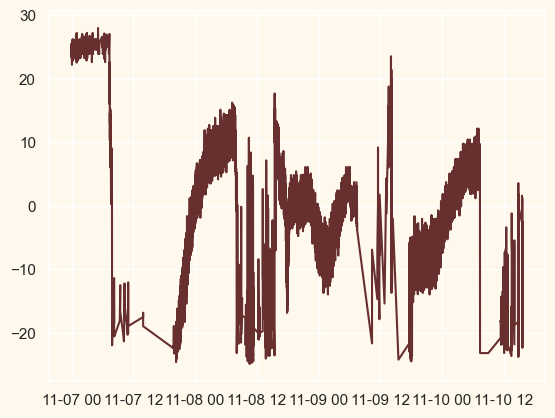

In [307]:
plt.plot(df_resampled_reduced['PCA_pm']);

Nadalje nije koriscen reduced

In [308]:
stdScaler = StandardScaler()
df_standardized = df_resampled_reduced.copy()
df_standardized = pd.DataFrame(stdScaler.fit_transform(df_standardized), columns = df_standardized.columns)
df_standardized.index = df_resampled.index

In [309]:
df_standardized.head()

,sound,pressure,temp,humidity,voc,CO2,PCA_pm
2022-11-07 00:00:32,-1.849224,-2.000813,-0.075771,0.704198,-0.485969,-0.748223,3.238568
2022-11-07 00:00:33,-0.737941,-2.031823,-0.075771,0.710286,-0.495797,-0.748223,3.238568
2022-11-07 00:00:34,-0.075900,-2.031823,-0.075771,0.710286,-0.501940,-0.702823,3.238568
2022-11-07 00:00:35,-1.695536,-2.051268,-0.069247,0.664597,-0.498868,-0.589325,3.161711
2022-11-07 00:00:36,1.177249,-2.086216,-0.056199,0.615839,-0.495797,-0.566625,3.161711


In [310]:
df_standardized.isna().sum()

sound       0
pressure    0
temp        0
humidity    0
voc         0
CO2         0
PCA_pm      0
dtype: int64

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Change point detection (Univariate)</p>

In [311]:
def PeltChangePointDetection(timeseries, kernel="linear", min_size=1, jump=1, pen=30):
    signal = timeseries.values
    algo_c = rpt.KernelCPD(kernel=kernel, min_size=min_size, jump=jump,).fit(signal)  # written in C, same class as before
    return algo_c.predict(pen=pen)

def BinSegChangePointDetection(timeseries, model="l2", min_size=1, jump=1, pen=30):
    signal = timeseries.values
    algo = rpt.Binseg(model=model, min_size=min_size, jump=jump).fit(signal)
    return algo.predict(pen=pen)

def DrawGraphs(df, feature, bkps1, bkps2):
    fig, axs = plt.subplots(ncols=2, figsize=(15,5))
    axs[0].plot(df[feature], color="#9F8A78")
    axs[0].set_title("Pelt Change Point Detection ({})".format(feature.upper()))
    for r in bkps1:
        axs[0].axvline(x=df.index[r-1], color="#F3AB60", linestyle='--')
    
    axs[1].plot(df[feature], color="#9F8A78")
    axs[1].set_title("BinSeg Change Point Detection ({})".format(feature.upper()))
    for r in bkps2:
        axs[1].axvline(x=df.index[r-1], color="#F3AB60", linestyle='--')

def calculate_magnitude(feature, bkps):
    magnitudes = []
    for i in range(len(bkps)-1):
        segment = feature[bkps[i]:bkps[i+1]]
        magnitude = np.abs(segment[-1] - segment[0])
        magnitudes.append(magnitude)
    return magnitudes

def plot_magnitudes(bkps, magnitudes, width=1300):
    # Add a dummy magnitude at the beginning to align with change points
    magnitudes.append(0)
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(bkps, magnitudes, width, color="#9F8A78")
    plt.xlabel('Change Point Index')
    plt.ylabel('Magnitude')
    plt.title('Magnitudes of Detected Changes')
    plt.show()
    magnitudes.pop(-1)

def plot_magnitudes2(bkps1, bkps2, magnitudes1, magnitudes2, width=1300):
    magnitudes1.append(0)
    magnitudes2.append(0)
    fig, axs = plt.subplots(ncols=2, figsize=(15,5))

    axs[0].bar(bkps1, magnitudes1, width, color="#9F8A78")
    axs[0].set_title("Pelt Change Point Detection Magnitudes")
    # Add a dummy magnitude at the beginning to align with change points
    
    axs[1].bar(bkps2, magnitudes2, width, color="#F3AB60")
    axs[1].set_title("BinSeg Change Point Detection Magnitudes")
    
    # Create a bar plot
    #plt.figure(figsize=(10, 6))
    #plt.bar(bkps, magnitudes, width, color="#9F8A78")
    axs[0].set_xlabel('Change Point Index')
    axs[0].set_ylabel('Magnitude')

    axs[1].set_xlabel('Change Point Index')
    axs[1].set_ylabel('Magnitude')
    plt.title('Magnitudes of Detected Changes')
    plt.show()

    magnitudes1.pop(-1)
    magnitudes2.pop(-1)


In [312]:
sound_bkps = PeltChangePointDetection(df_standardized['sound'], min_size=10, jump=5, pen=100)
sound_bkps2 = BinSegChangePointDetection(df_standardized['sound'], min_size=10, jump=5, pen=100)

pressure_bkps = PeltChangePointDetection(df_standardized['pressure'], min_size=10, jump=5, pen=100)
pressure_bkps2 = BinSegChangePointDetection(df_standardized['pressure'], min_size=10, jump=5, pen=100)

temp_bkps = PeltChangePointDetection(df_standardized['temp'], min_size=10, jump=5, pen=100)
temp_bkps2 = BinSegChangePointDetection(df_standardized['temp'], min_size=10, jump=5, pen=100)

humidity_bkps = PeltChangePointDetection(df_standardized['humidity'], min_size=10, jump=5, pen=100)
humidity_bkps2 = BinSegChangePointDetection(df_standardized['temp'], min_size=10, jump=5, pen=100)

voc_bkps = PeltChangePointDetection(df_standardized['voc'], min_size=10, jump=5, pen=100)
voc_bkps2 = BinSegChangePointDetection(df_standardized['voc'], min_size=10, jump=5, pen=100)

CO2_bkps = PeltChangePointDetection(df_standardized['CO2'], min_size=10, jump=5, pen=100)
CO2_bkps2 = BinSegChangePointDetection(df_standardized['CO2'], min_size=10, jump=5, pen=100)

PCA_pm_bkps = PeltChangePointDetection(df_standardized['PCA_pm'], min_size=10, jump=5, pen=100)
PCA_pm_bkps2 = BinSegChangePointDetection(df_standardized['PCA_pm'], min_size=10, jump=5, pen=100)

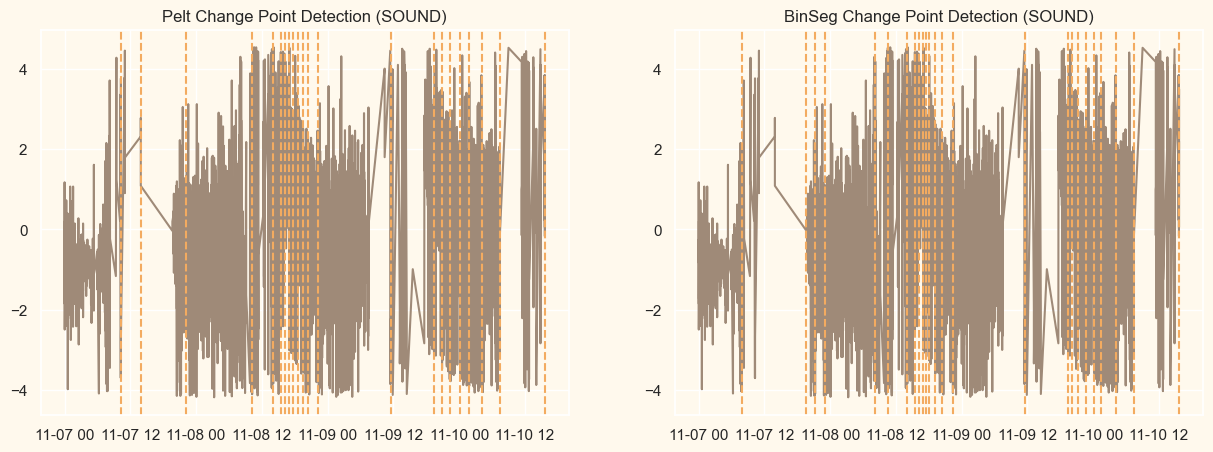

In [313]:
DrawGraphs(df_standardized, 'sound', sound_bkps, sound_bkps2)

In [314]:
magnitudes_pelt = calculate_magnitude(df_standardized['sound'], sound_bkps)
magnitudes_binseg = calculate_magnitude(df_standardized['sound'], sound_bkps2)

print(magnitudes_pelt)
print(magnitudes_binseg)

[1.8383456998749381, 0.1714213032037707, 3.3397598727631506, 1.7910570645083794, 1.2058602018472255, 1.4600366169424732, 0.8630175954396813, 1.4186590609967373, 0.22462101799115086, 0.8511954365980432, 1.879723255820674, 0.9221283896478767, 0.5970190215027923, 2.187099385703301, 0.6856852128150894, 0.43741987714066044, 0.22462101799115097, 0.957594866172799, 1.0521721369059132, 0.07093295304983493, 2.3289652918029753]
[0.6738630539734496, 0.496530671348859, 0.24826533567442793, 1.241326678372145, 4.652019504185133, 2.062966717866086, 0.21279885914950958, 0.27782073277852604, 0.35466476524918455, 0.08275511189147622, 0.1182215884163953, 0.1182215884163953, 0.03546647652491752, 0.42559771829902004, 0.6738630539734495, 5.645080846882847, 0.21279885914950958, 0.03546647652491752, 0.03546647652492074, 0.01773323826246115, 0.3901312417741034, 0.1418659060996731, 0.6975073716567282, 2.3526096094862554]


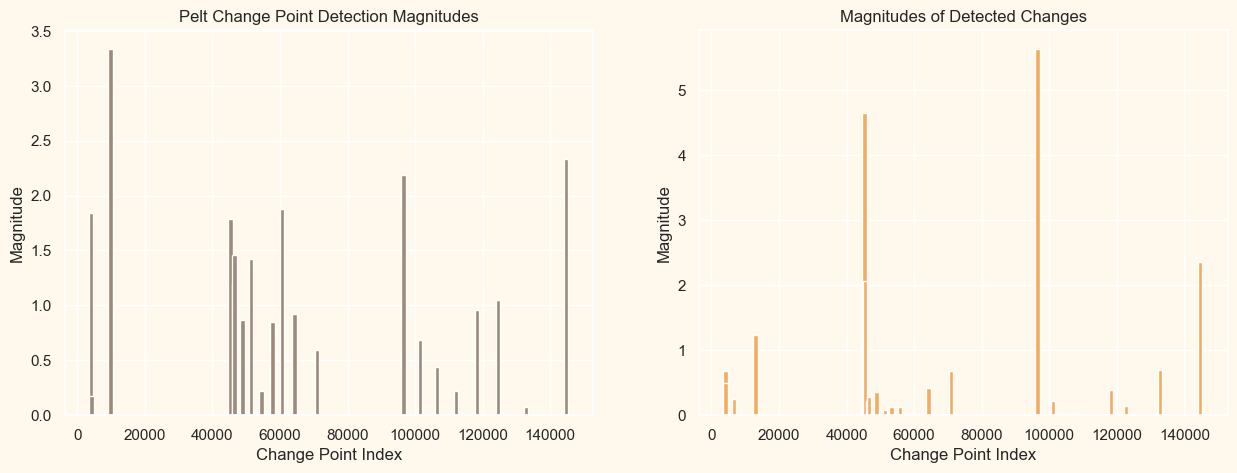

In [315]:
plot_magnitudes2(sound_bkps, sound_bkps2, magnitudes_pelt, magnitudes_binseg)

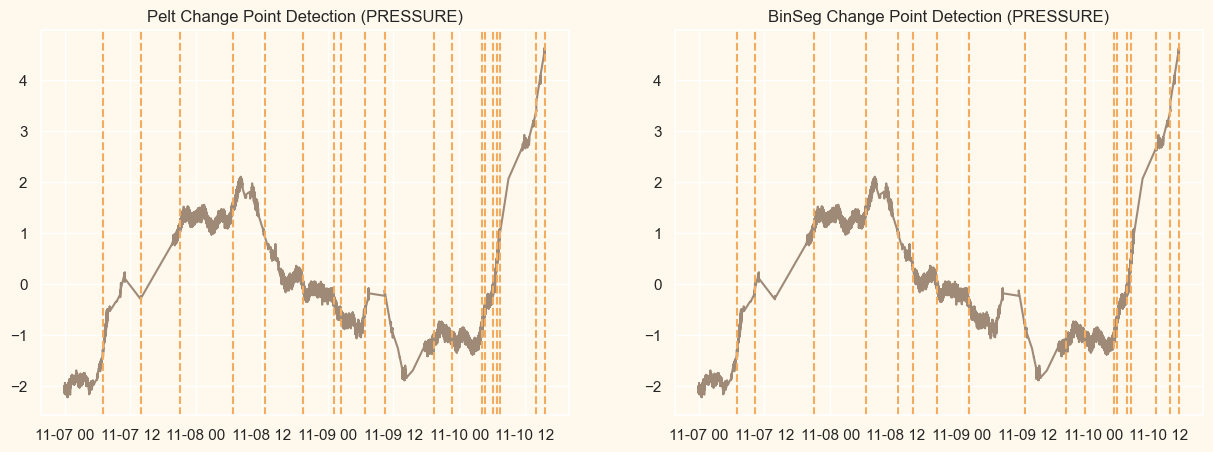

In [316]:
DrawGraphs(df_standardized, 'pressure', pressure_bkps, pressure_bkps2)

In [317]:
magnitudes_pelt_pressure = calculate_magnitude(df_standardized['pressure'], pressure_bkps)
magnitudes_binseg_pressure = calculate_magnitude(df_standardized['pressure'], pressure_bkps2)

print(magnitudes_pelt_pressure)
print(magnitudes_binseg_pressure)

[1.0133809103056737, 0.22926885615731152, 0.2741503231162812, 0.6103285021967555, 0.6585422796639095, 0.23002946377585698, 0.20648612818847673, 0.15681526577808164, 0.13654976091554058, 0.3538235347605748, 0.054948168599195935, 0.19191394230361103, 0.2953264648670153, 0.31069267619384683, 0.44643429447239363, 0.5241135411662485, 1.500741189110033, 0.5076574965383891]
[1.1915346016717483, 0.9988375459147601, 0.2935938687372952, 0.46686633610639006, 0.7397961699628285, 0.3055485476477797, 0.35255768093694223, 0.27863343110198485, 0.2940809894615174, 0.1899144771103185, 0.056397143597874844, 0.2833396959468425, 0.512810679793272, 0.4774041421756131, 2.203384799442231, 0.7646728738329451, 1.1623559778332284]


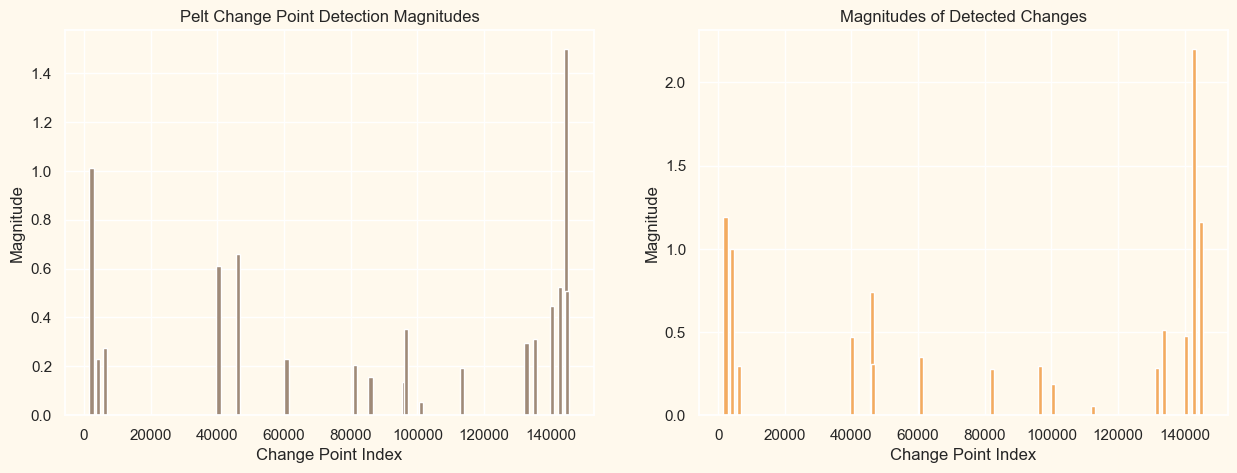

In [318]:
plot_magnitudes2(pressure_bkps, pressure_bkps2, magnitudes_pelt_pressure, magnitudes_binseg_pressure)

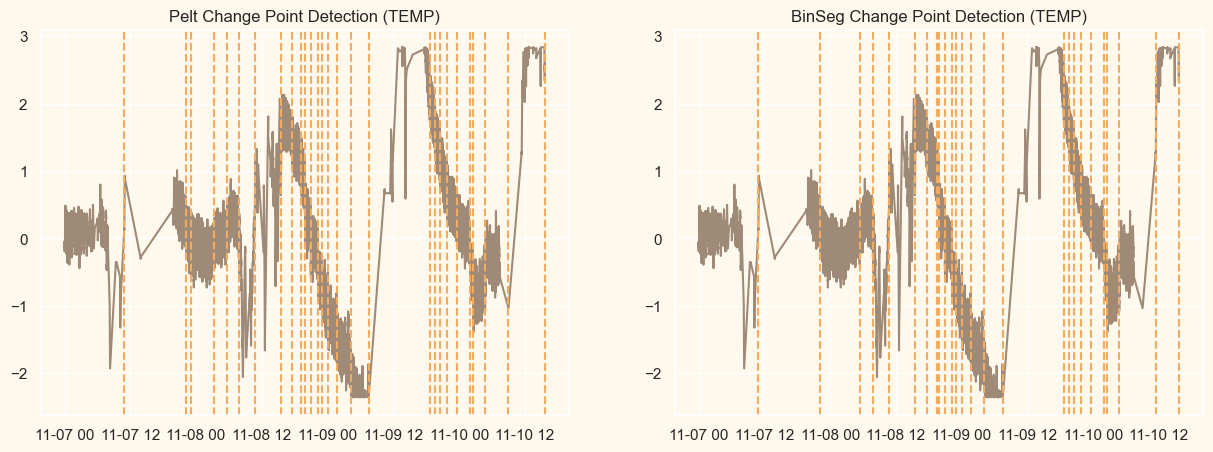

In [319]:
DrawGraphs(df_standardized, 'temp', temp_bkps, temp_bkps2)

In [320]:
magnitudes_pelt_temp = calculate_magnitude(df_standardized['pressure'], temp_bkps)
magnitudes_binseg_temp = calculate_magnitude(df_standardized['pressure'], temp_bkps2)

print(magnitudes_pelt_temp)
print(magnitudes_binseg_temp)

[1.1983151222585189, 0.09745165778400833, 0.0894308871056313, 0.015773623724790964, 0.6956176475073417, 0.23682652596809417, 1.4045194134499002, 0.12412331537104965, 0.1297855983853698, 0.36822172413707444, 0.11347889362719578, 0.06597931187701948, 0.06372671651713915, 0.12864739083590615, 0.30351288071268817, 0.23386786611683474, 0.5017814237880428, 1.0348275827145348, 0.17870458738929518, 0.27463457095531063, 0.2160493512145394, 0.29416800465810644, 0.006751648181410941, 0.0928298987346663, 0.66589607639684, 2.556956870949489, 1.9308400129453123]
[1.1037139680410375, 0.15161762990165806, 0.6917808318402057, 0.2950062552007846, 1.3402621871893068, 0.06752037094922203, 0.2279313416420598, 0.0885339595262617, 0.10552666698032383, 0.05052273285406203, 0.0042130866278055484, 0.11507659416104024, 0.28801197145539736, 0.2259402126326177, 0.5092319487177197, 1.0311301644170705, 0.22551569774598867, 0.18722498823001643, 0.01386746202582645, 0.22424071348995178, 0.02800005740186906, 0.13540963

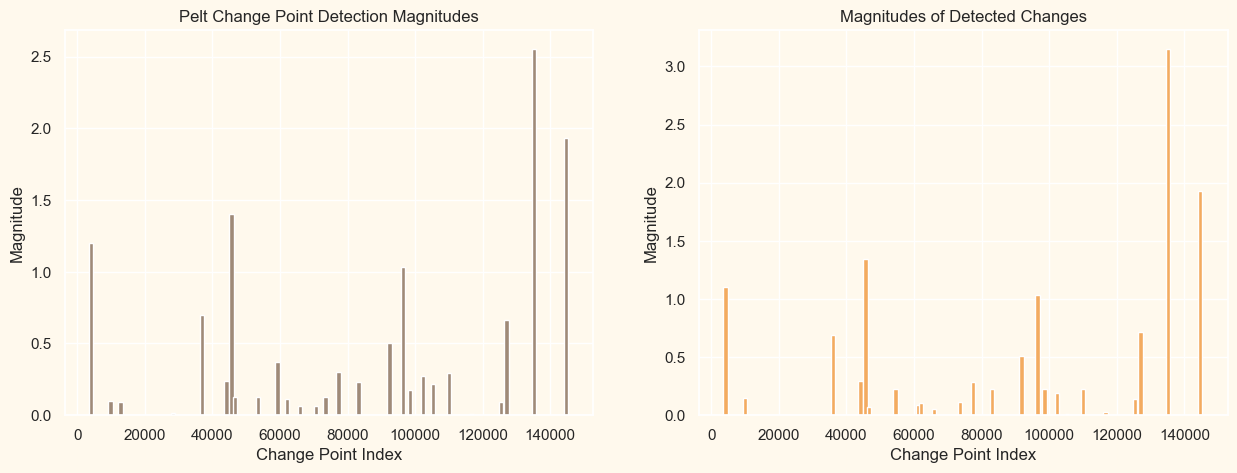

In [321]:
plot_magnitudes2(temp_bkps, temp_bkps2, magnitudes_pelt_temp, magnitudes_binseg_temp)

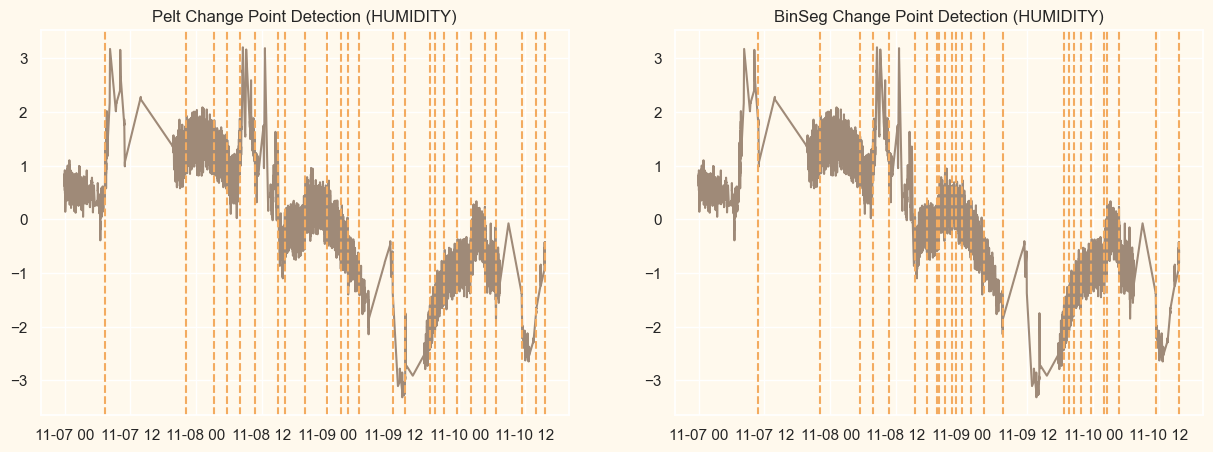

In [322]:
DrawGraphs(df_standardized, 'humidity', humidity_bkps, humidity_bkps2)

In [323]:
magnitudes_pelt_humidity = calculate_magnitude(df_standardized['humidity'], humidity_bkps)
magnitudes_binseg_humidity = calculate_magnitude(df_standardized['pressure'], humidity_bkps2)

print(magnitudes_pelt_humidity)
print(magnitudes_binseg_humidity)

[0.42588492784308374, 0.186071674256596, 0.29581064714424277, 0.09782763916528125, 0.13494181143161832, 0.0366275255165015, 0.33265508543782524, 0.35988631314683917, 0.043751971422897544, 0.2859871068406518, 0.31815193363929567, 0.42580362283223905, 0.16609367828758081, 0.28325410749388213, 0.5872272013559918, 0.345814128383235, 0.3924981093299855, 0.25969464749977866, 0.12642959022103195, 0.003134841003912925, 0.38427125695966136, 0.3375400447814567, 0.507959766880089, 0.6663654875795806]
[1.1037139680410375, 0.15161762990165806, 0.6917808318402057, 0.2950062552007846, 1.3402621871893068, 0.06752037094922203, 0.2279313416420598, 0.0885339595262617, 0.10552666698032383, 0.05052273285406203, 0.0042130866278055484, 0.11507659416104024, 0.28801197145539736, 0.2259402126326177, 0.5092319487177197, 1.0311301644170705, 0.22551569774598867, 0.18722498823001643, 0.01386746202582645, 0.22424071348995178, 0.02800005740186906, 0.13540963407460516, 0.7125072429724301, 3.154666724237222, 1.93084001

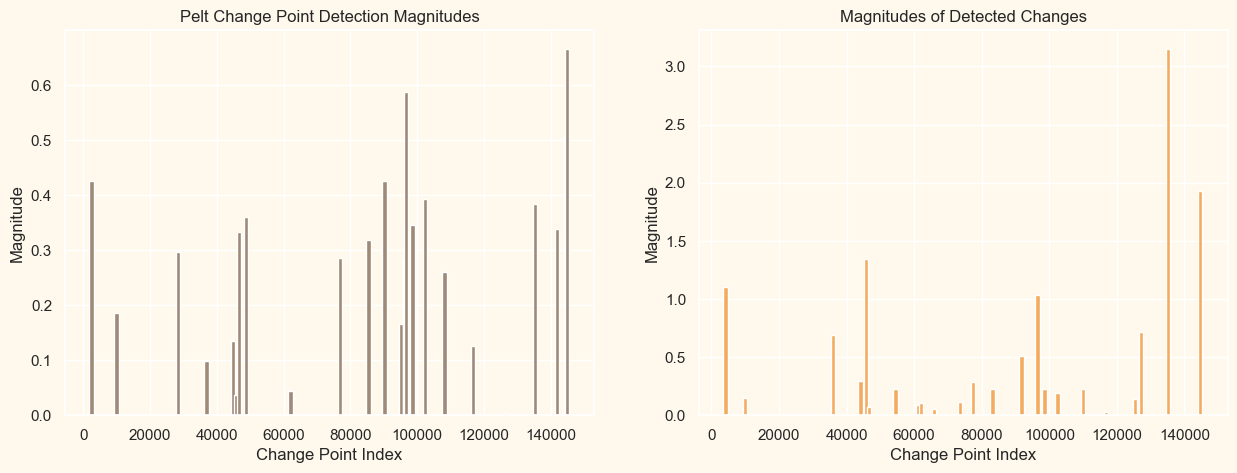

In [324]:
plot_magnitudes2(humidity_bkps, humidity_bkps2, magnitudes_pelt_humidity, magnitudes_binseg_humidity)

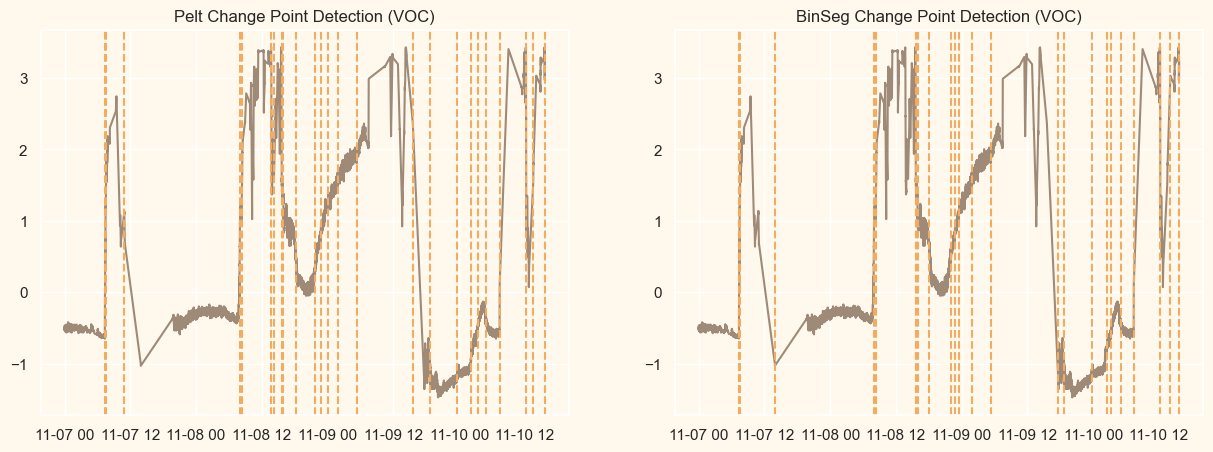

In [325]:
DrawGraphs(df_standardized, 'voc', voc_bkps, voc_bkps2)

In [326]:
magnitudes_pelt_voc = calculate_magnitude(df_standardized['voc'], voc_bkps)
magnitudes_binseg_voc = calculate_magnitude(df_standardized['voc'], voc_bkps2)

print(magnitudes_pelt_voc)
print(magnitudes_binseg_voc)

[1.1204562832543492, 0.22974268088658256, 0.4312282405946015, 1.3329989773365887, 0.40358540465905035, 0.11487134044329128, 0.10811420277015626, 1.0995705849919326, 0.6505280723499757, 0.1326856124906466, 0.45579965031509156, 0.38331399163964575, 0.34522830657288606, 0.3353997426846902, 0.4084996866031483, 0.11794276665835257, 0.06388566527327444, 0.28502835275768545, 0.3771711392095233, 0.06388566527327433, 0.5516281482250031, 0.9681135429873104, 0.9386278513227223, 0.26045694303719547]
[0.6879994721737231, 0.8513993468149824, 2.4215124279543003, 1.4134703441711938, 1.2347133384546283, 0.09152850120882583, 0.8059422388320756, 0.5424138695798192, 0.14374274686486715, 0.3458425918158984, 0.303456910048053, 0.43245681108062617, 0.3845425621256704, 3.2471117945627688, 0.16831415658535742, 0.029485691664588032, 0.3390854541427635, 0.23527124807369282, 0.12654276006052412, 0.5374995876357211, 2.3047982317819726, 0.5405710138507827, 0.26045694303719547]


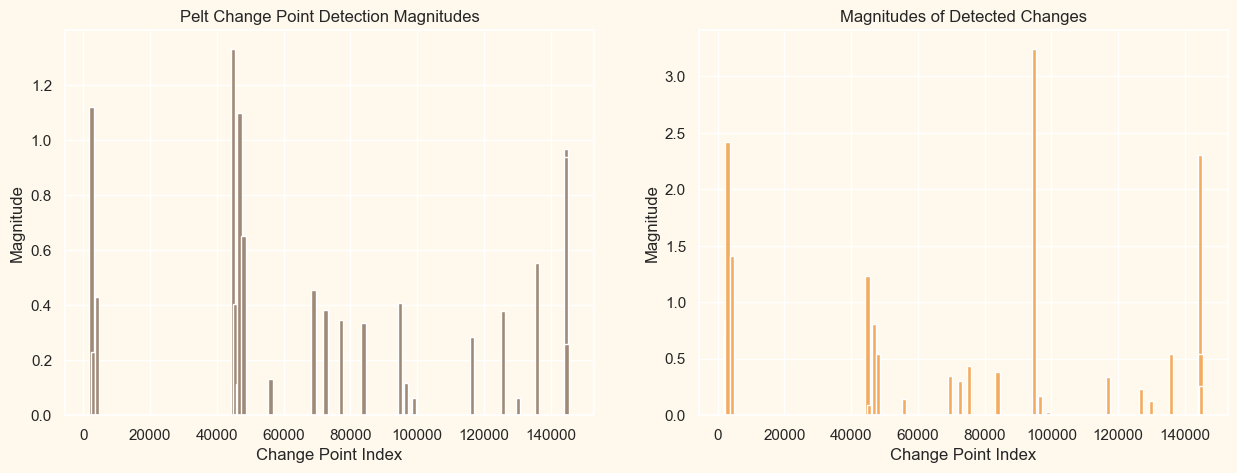

In [327]:
plot_magnitudes2(voc_bkps, voc_bkps2, magnitudes_pelt_voc, magnitudes_binseg_voc)

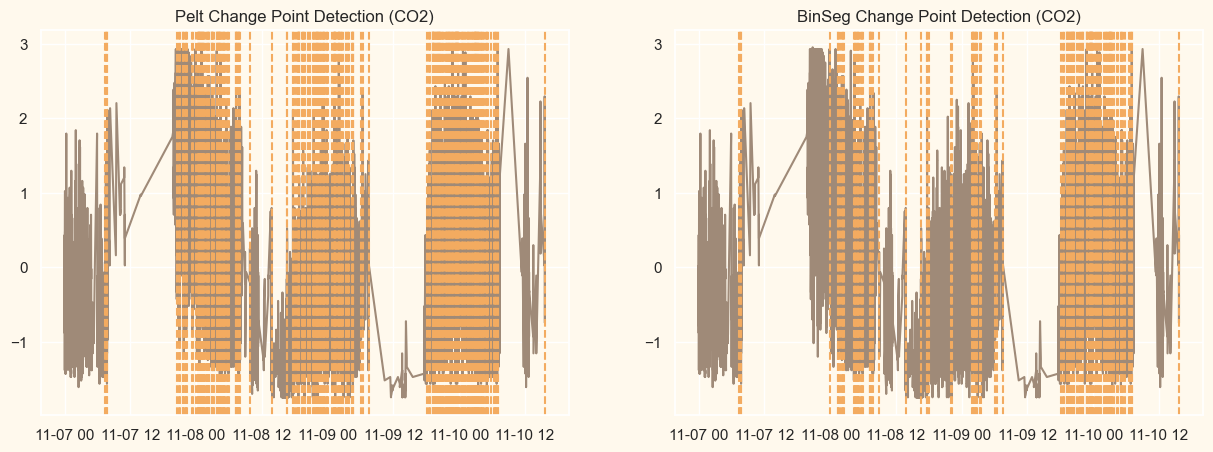

In [328]:
DrawGraphs(df_standardized, 'CO2', CO2_bkps, CO2_bkps2)

In [329]:
magnitudes_pelt_CO2 = calculate_magnitude(df_standardized['CO2'], CO2_bkps)
magnitudes_binseg_CO2 = calculate_magnitude(df_standardized['CO2'], CO2_bkps2)

print(magnitudes_pelt_CO2)
print(magnitudes_binseg_CO2)

[0.09079909364229921, 0.0, 0.40859592139034595, 0.7717922959595425, 0.5447945618537947, 0.06809932023172427, 0.8625913896018415, 0.31779682774804696, 0.31779682774804685, 0.4539954682114956, 0.18159818728459826, 0.7717922959595424, 0.7263927491383928, 0.0, 0.20429796069517292, 0.22699773410574786, 0.40859592139034606, 0.5447945618537946, 0.2723972809268973, 0.04539954682114955, 0.27239728092689736, 0.0, 0.18159818728459826, 0.5447945618537947, 0.0, 0.2723972809268974, 0.0, 0.31779682774804685, 0.3177968277480469, 0.04539954682114955, 0.4993950150326451, 0.02269977341057483, 0.31779682774804685, 0.3177968277480469, 1.3392866312239118, 0.2723972809268973, 0.47669524162207044, 0.5674943352643694, 0.13619864046344865, 0.5901941086749443, 0.22699773410574775, 0.0907990936422991, 0.31779682774804685, 0.295097054337472, 0.6355936554960937, 0.27239728092689736, 0.0, 0.45399546821149556, 0.15889841387402345, 0.06809932023172434, 0.6355936554960938, 0.22699773410574775, 0.7717922959595425, 0.090

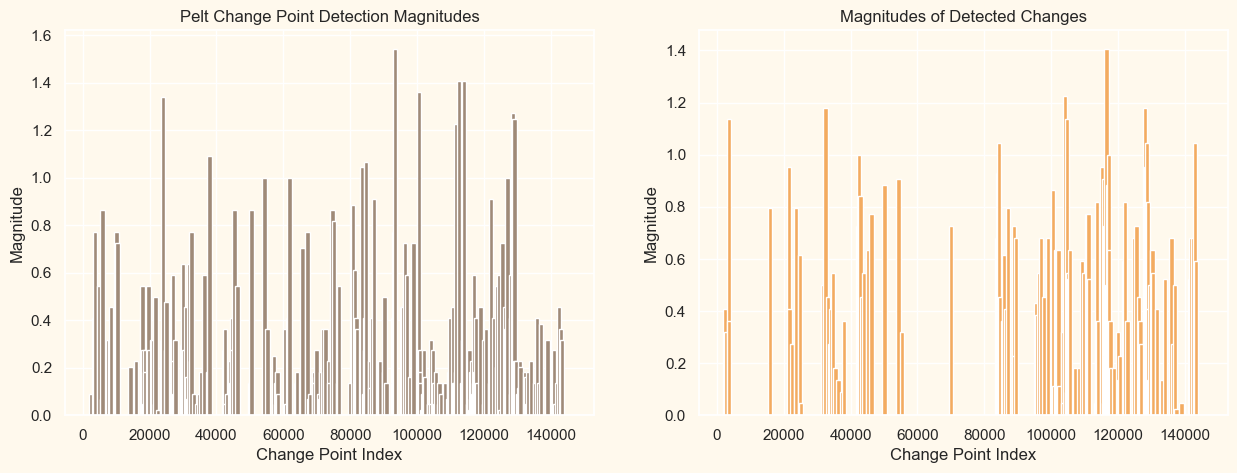

In [330]:
plot_magnitudes2(CO2_bkps, CO2_bkps2, magnitudes_pelt_CO2, magnitudes_binseg_CO2)

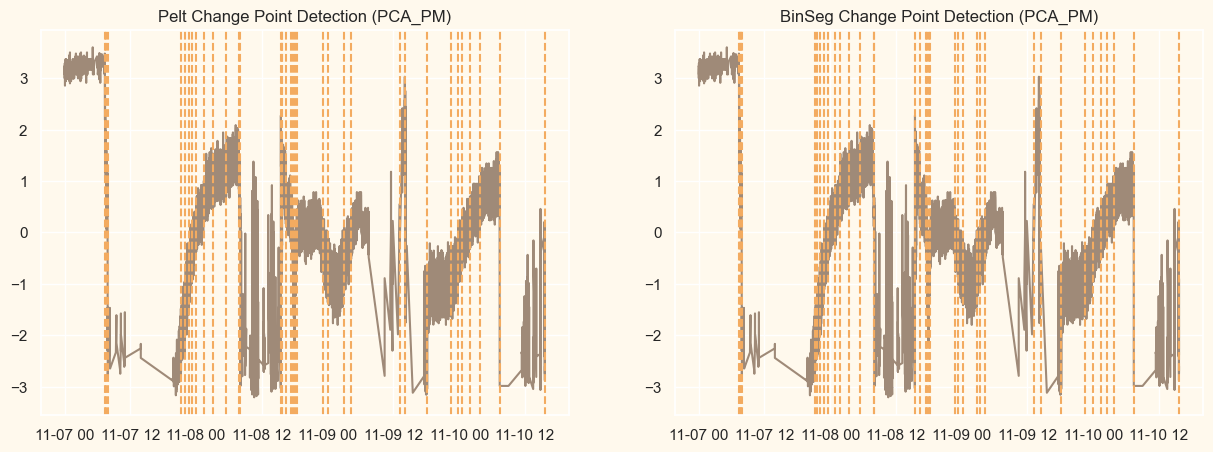

In [331]:
DrawGraphs(df_standardized, 'PCA_pm', PCA_pm_bkps, PCA_pm_bkps2)

In [332]:
magnitudes_pelt_PCA_pm = calculate_magnitude(df_standardized['PCA_pm'], PCA_pm_bkps)
magnitudes_binseg_PCA_pm = calculate_magnitude(df_standardized['PCA_pm'], PCA_pm_bkps2)

print(magnitudes_pelt_PCA_pm)
print(magnitudes_binseg_PCA_pm)

[1.2027707457767078, 1.8855111268050444, 1.1422251103057992, 0.5474852782223587, 0.49425541411481855, 0.15371428207616156, 0.19580073827688688, 0.3834566467148931, 0.24712770705740938, 0.0, 0.3383716124462338, 1.2478557800453673, 0.06354421353884321, 0.045085034268659396, 0.3450280761958527, 0.010314349431303826, 0.08717149046938433, 0.6675136352573758, 0.23274094270666568, 0.483941064683515, 0.13225652473804356, 0.2962851562455087, 0.0506567382220664, 0.3937709961461965, 0.0897555392995629, 0.21942801520742794, 1.4311726492985275, 0.3280572630149301, 0.1425708741693471, 0.08717149046938444, 0.18765590843800634, 0.22974236463873143, 1.0520550417684804, 2.033250098634748]
[0.9730283811379765, 0.010314349431303382, 1.282626464882723, 1.713337665458699, 0.4839410646835156, 0.5260275208842404, 0.5157131714529362, 0.43885603041485594, 0.46031378775297394, 0.3937709961461966, 0.13225652473804372, 0.3280572630149303, 0.32805726301493, 1.3350272705147517, 0.245224811730392, 1.184311566506524, 

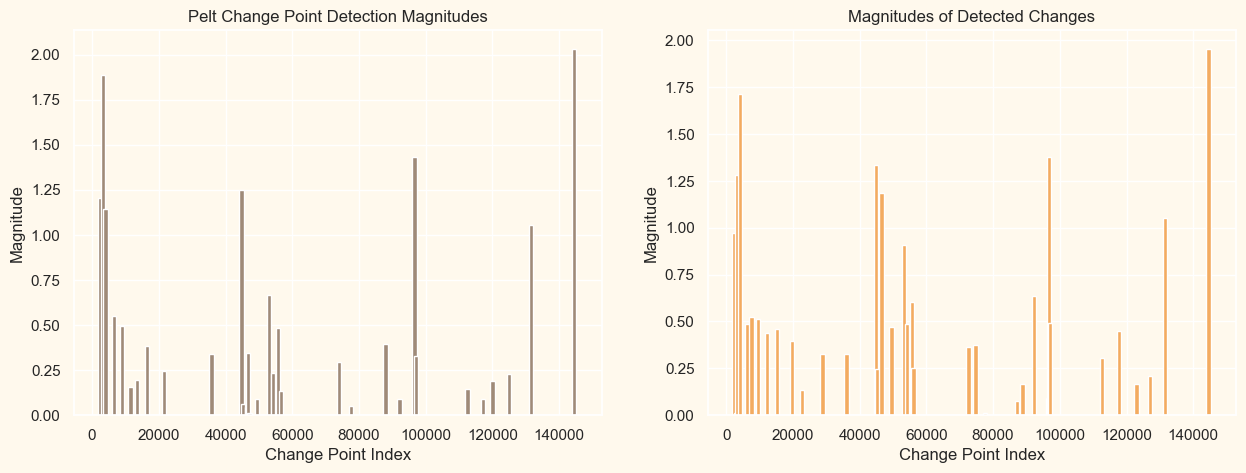

In [333]:
plot_magnitudes2(PCA_pm_bkps, PCA_pm_bkps2, magnitudes_pelt_PCA_pm, magnitudes_binseg_PCA_pm)


Trenutno nije jasno da li je potrebno odraditi change point detection za sve ficere posebno i ako da, kako to generalizovati.

Ideja je da odradim za svaki timeseries posebno i onda da imam nezavisne kolone za sve to.

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Change point detection - Multivariate (PELT)</p>

In [334]:
data = np.array(df_standardized)

In [335]:
signal = data
algo_c = rpt.KernelCPD(kernel="linear", min_size=10, jump=5,).fit(signal)  # written in C, same class as before
bkps = algo_c.predict(pen=100)

ruptures je za non-stationary signals. Meni su podaci stationary osim pressure. Ispitati ovo malo bolje. Sta je stacionarnost, deluje mi da mi podaci nisu stacionarni i da imaju neki trend. Ispitati to.

Izgleda da su moji signali stacionarni u delovima (piecewise stationary)

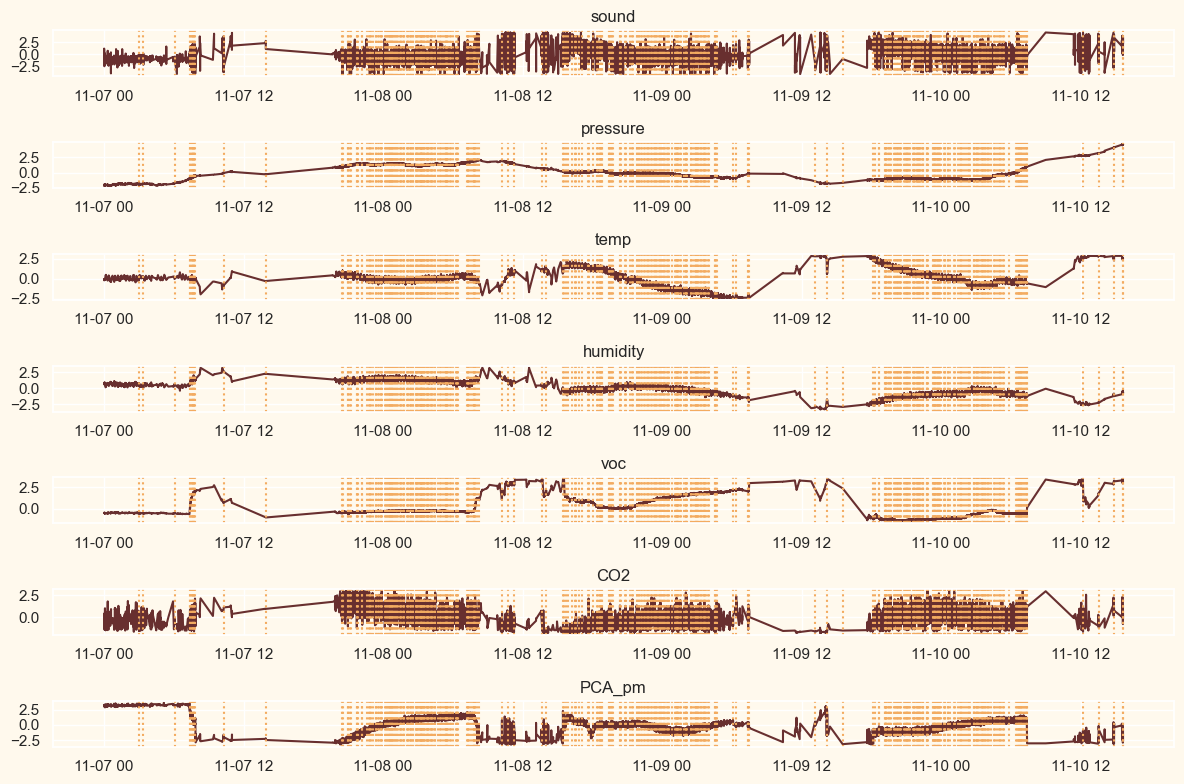

In [336]:
# Get the number of features in the dataset
num_features = df_standardized.shape[1]

# Set the number of columns for the subplots (e.g., 2, 3, 4, etc.)
num_cols = 1

# Calculate the number of rows needed for the subplots
num_rows = (num_features + num_cols - 1) // num_cols

# Create the main figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the 2D subplots array into a 1D array (in case we have only one row or one column of subplots)
axs = axs.ravel()

# Loop through each feature and create a plot for it
for i, feature in enumerate(df_standardized.columns):
    axs[i].plot(df_standardized[feature])
    axs[i].set_title(feature)
    for r in bkps:
        axs[i].axvline(x=df_standardized.index[r-1], color="#F3AB60", linestyle=':')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()
# Show the plot
plt.show()


# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Change point detection - Multivariate (BinSeg)</p>

In [337]:
signal = data
algo = rpt.Binseg(model="l2", min_size=10, jump=5,).fit(signal)  # written in C, same class as before
bkps = algo.predict(pen=100)

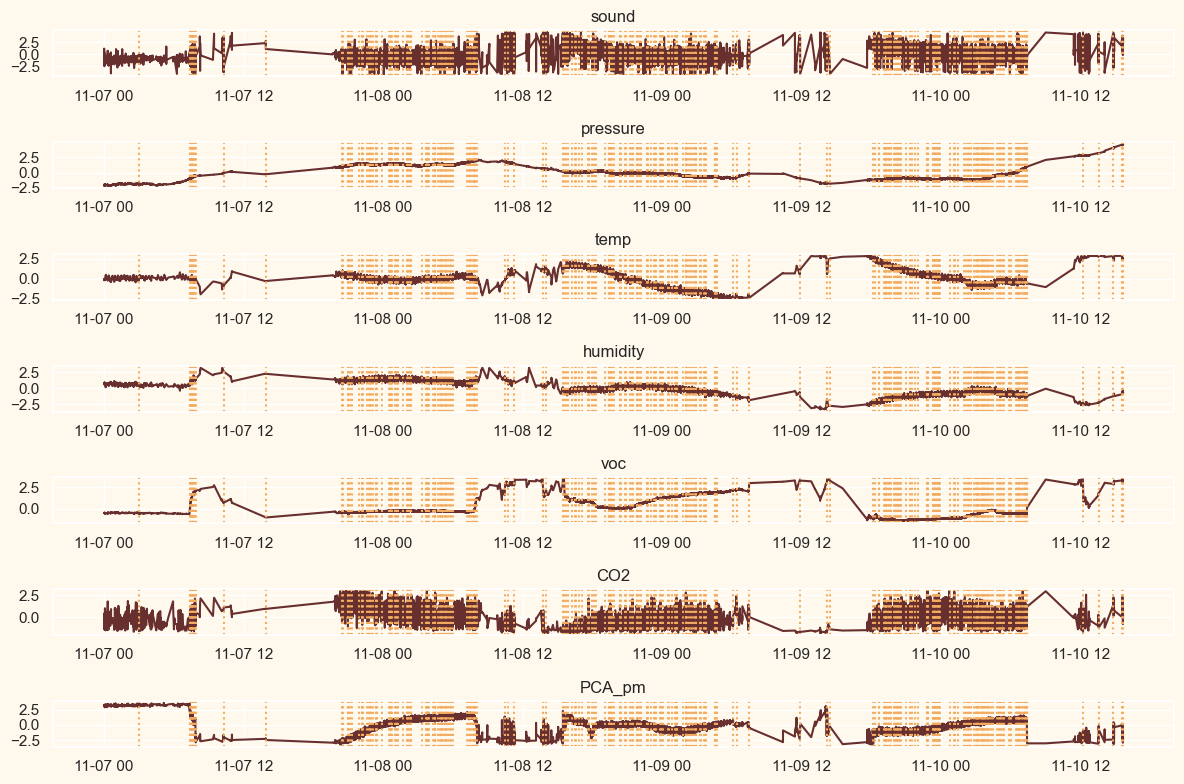

In [338]:
# Get the number of features in the dataset
num_features = df_standardized.shape[1]

# Set the number of columns for the subplots (e.g., 2, 3, 4, etc.)
num_cols = 1

# Calculate the number of rows needed for the subplots
num_rows = (num_features + num_cols - 1) // num_cols

# Create the main figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the 2D subplots array into a 1D array (in case we have only one row or one column of subplots)
axs = axs.ravel()

# Loop through each feature and create a plot for it
for i, feature in enumerate(df_standardized.columns):
    axs[i].plot(df_standardized[feature])
    axs[i].set_title(feature)
    for r in bkps:
        axs[i].axvline(x=df_standardized.index[r-1], color="#F3AB60", linestyle=':')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()
# Show the plot
plt.show()